## A first example of NN for Images, using Fashion Mnist

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
# check TensorFlow version
print(tf.__version__)

2.4.1


In [3]:
data = tf.keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [5]:
print('Number of training images:', train_images.shape[0])
print('Number of test images:', test_images.shape[0])

Number of training images: 60000
Number of test images: 10000


In [6]:
# how many distinct classes
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
# ok 10 distinct classes labeled as 0..9

In [8]:
# images are greyscale images
train_images.shape

(60000, 28, 28)

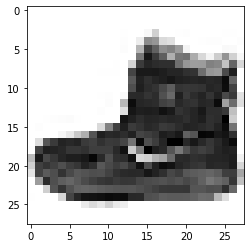

In [9]:
# let's sess one image
plt.imshow(train_images[0], cmap = 'Greys');

In [23]:
# let's build a first classification model
def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation = 'relu'),
        
        # adding these two intermediate layers I go from 0.85 to 0.87 validation accuracy
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(32, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
    ])
    
    model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
    
    return model

In [24]:
# let's see how many parameters, etc
model = build_model()

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [25]:
# add a Callback that saves when the best (lowest( validation loss is achieved)

In [26]:
EPOCHS = 40
BATCH_SIZE = 256

chk_clbck = tf.keras.callbacks.ModelCheckpoint(
    filepath = 'model.h5',
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="min",
    save_freq="epoch",
)

history = model.fit(train_images, train_labels, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_split = 0.1, callbacks = [chk_clbck])

Epoch 1/40
211/211 [==============================] - 1s 3ms/step - loss: 11.0576 - accuracy: 0.5941 - val_loss: 1.2594 - val_accuracy: 0.7660

Epoch 00001: val_loss improved from inf to 1.25942, saving model to model.h5
Epoch 2/40
211/211 [==============================] - 1s 5ms/step - loss: 1.0487 - accuracy: 0.7777 - val_loss: 0.8530 - val_accuracy: 0.7945

Epoch 00002: val_loss improved from 1.25942 to 0.85301, saving model to model.h5
Epoch 3/40
211/211 [==============================] - 1s 3ms/step - loss: 0.6964 - accuracy: 0.8094 - val_loss: 0.7036 - val_accuracy: 0.8075

Epoch 00003: val_loss improved from 0.85301 to 0.70361, saving model to model.h5
Epoch 4/40
211/211 [==============================] - 1s 3ms/step - loss: 0.5694 - accuracy: 0.8262 - val_loss: 0.6356 - val_accuracy: 0.8148

Epoch 00004: val_loss improved from 0.70361 to 0.63562, saving model to model.h5
Epoch 5/40
211/211 [==============================] - 1s 3ms/step - loss: 0.4900 - accuracy: 0.8414 - val_l

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy =  history.history['accuracy']
val_accuracy =  history.history['val_accuracy']

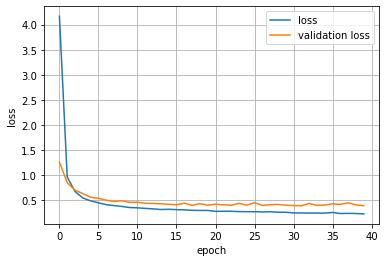

In [28]:
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(loss, label = 'loss')
plt.plot(val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.grid();

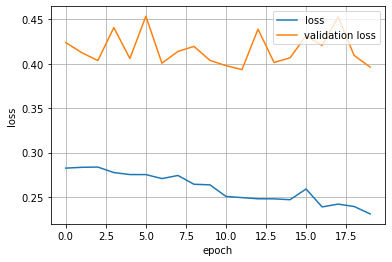

In [29]:
# wants to see if it starts overfitting
START = 20

plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(loss[START:], label = 'loss')
plt.plot(val_loss[START:], label = 'validation loss')
plt.legend(loc = 'upper right')
plt.grid();

In [30]:
# ok it has slightly started overfitting.. as we can see from epochs 15 validation loss becomes higher and training loss is still decreasing

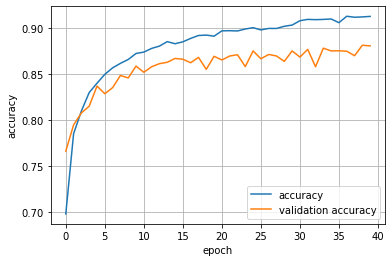

In [31]:
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(accuracy, label = 'accuracy')
plt.plot(val_accuracy, label = 'validation accuracy')
plt.legend(loc = 'lower right')
plt.grid();

In [49]:
# load the best model
model = build_model()

model.load_weights('model.h5')

In [51]:
loss, acc = model.evaluate(test_images, test_labels)

print('')
print('Test accuracy is:', acc)

313/313 [==============================] - 0s 933us/step - loss: 0.4071 - accuracy: 0.8730

Test accuracy is: 0.8730000257492065
